### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [288]:
data = sm.datasets.sunspots.load_pandas()
sunspots = data.data.copy()
air = pd.read_csv('data/AirPassengers.csv')

In [289]:
sunspots.head(5)

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [290]:
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         309 non-null    float64
 1   SUNACTIVITY  309 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


In [291]:
sunspots.set_index(pd.to_datetime(sunspots['YEAR'], format = '%Y'), inplace = True)
sunspots.drop(columns = ['YEAR'], inplace = True)

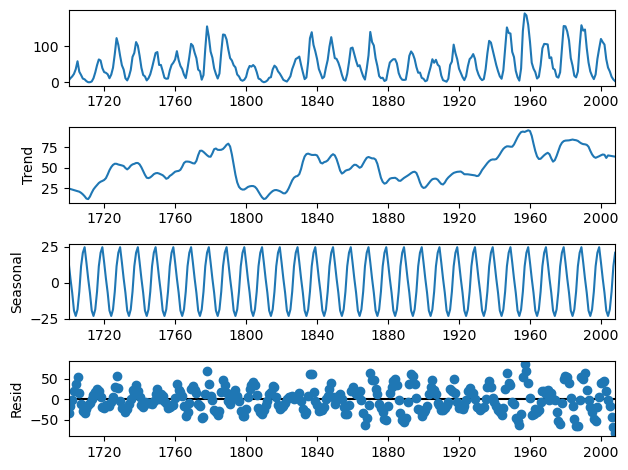

In [292]:
result1 = seasonal_decompose(sunspots, period=10, model='additive', extrapolate_trend=True)
result1.plot()
plt.show()

In [293]:
air.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [294]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [295]:
air.set_index(pd.to_datetime(air['Month']), inplace=True)
air.drop(columns=['Month'], inplace=True)
air.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

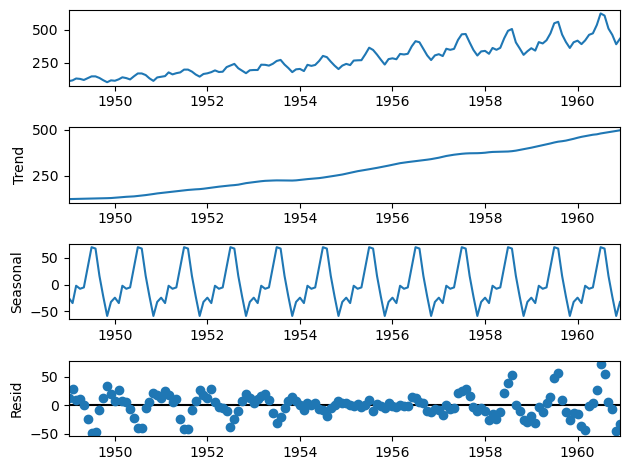

In [296]:
result2 = seasonal_decompose(air, period=12, model='additive', extrapolate_trend=True)
result2.plot()
plt.show()

In [297]:
c1 = air.groupby(by = [air.index.year]).sum()
c2 = c1.pct_change()
c2.dropna(inplace=True)
fig1 = px.line(data_frame=c2)
fig1.show()

In [298]:
change = result2.trend.pct_change()
df1 = change.groupby(by = [change.index.year]).sum() * 100

In [300]:
fig1 = px.line(x=df1.index, y=df1, text=df1.round(2))

fig1.update_xaxes(
    ticktext=df1.index.values,
    tickvals=df1.index.values,
    ticklen=12
)

fig1.add_annotation(
    x='1949', y=20 + 1,
    text=f'Recession<br>Nov  \'48 - Oct  \'49',
    yanchor='bottom', showarrow=False,
    arrowhead=1, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
    ax=-20, ay=-30,
    font=dict(size=16, color='cyan', family='Arial'), align='left')

fig1.add_annotation(
    x='1953', y=20 + 1,
    text=f'Recession<br>Jul  \'53 - May  \'54',
    yanchor='bottom', showarrow=False,
    arrowhead=1, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
    ax=-20, ay=-30,
    font=dict(size=16, color='cyan', family='Arial'), align='left')

fig1.add_annotation(
    x='1958', y=20 + 1,
    text=f'Recession<br>Aug  \'57 - Apr  \'58',
    yanchor='bottom', showarrow=False,
    arrowhead=1, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
    ax=-20, ay=-30,
    font=dict(size=16, color='cyan', family='Arial'), align='left')

fig1.add_annotation(
    x='1960', y=20 + 1,
    text=f'Recession<br>Apr  \'60 - Feb  \'61',
    yanchor='bottom', showarrow=False,
    arrowhead=1, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
    ax=-20, ay=-30,
    font=dict(size=16, color='cyan', family='Arial'), align='left')

fig1.update_layout(
    shapes=[
        dict(type='line', line=dict(color='yellow', width=3, dash='dot'),
             yref='paper', y0=0, y1=1,
             xref='x', x0='1949', x1='1949'),
        dict(type='line', line=dict(color='yellow', width=3, dash='dot'),
             yref='paper', y0=0, y1=1,
             xref='x', x0='1953', x1='1953'),
        dict(type='line', line=dict(color='yellow', width=3, dash='dot'),
             yref='paper', y0=0, y1=1,
             xref='x', x0='1958', x1='1958'),
        dict(type='line', line=dict(color='yellow', width=3, dash='dot'),
             yref='paper', y0=0, y1=1,
             xref='x', x0='1960', x1='1960'),
    ])

fig1.show()

# Source: https://www.investopedia.com/articles/economics/08/past-recessions.asp